In [102]:
from langchain_openai import ChatOpenAI
import os
from dotenv import load_dotenv

# Load API Key
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

# Initialize the language model
llm = ChatOpenAI(openai_api_key=api_key, max_tokens=100, temperature=0.7)

In [103]:
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a CPTSD Therapist with 20 plus years experience in healing people from CPTSD."),
    ("user", "{input}"),
    
])

chain = prompt | llm


In [104]:
from langchain_core.output_parsers import StrOutputParser

output_parser = StrOutputParser()
chain = chain | output_parser


In [105]:
import pdfplumber

# Function to read and update the current page number
def get_and_update_current_page(file_path, increment=2):
    try:
        with open(file_path, 'r') as file:
            current_page = int(file.read().strip())
    except FileNotFoundError:
        current_page = 0  # Default starting page if file not found

    new_current_page = current_page + increment

    with open(file_path, 'w') as file:
        file.write(str(new_current_page))

    return current_page, new_current_page

# Function to extract text from a specific section of the PDF
def extract_section_from_pdf(pdf_path, start_page, end_page):
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        pages = pdf.pages[start_page:end_page]
        for page in pages:
            text += page.extract_text() + "\n"
    return text

# File to store current page number
current_page_file = 'current_page.txt'

# Get the current page and update it for the next run
start_page, next_start_page = get_and_update_current_page(current_page_file)


# Extract text from today's section
pdf_text = extract_section_from_pdf("CPTSD.pdf", start_page, next_start_page)

# Invoke the chain with your query
response = chain.invoke({"input": "write a 20 words inspirational quote for a person suffering from cptsd that would heal them, from the following text" + pdf_text})

# Print the response
print(response)
#print(pdf_text)

quote=response

"Embrace your inner child with love and compassion. You are worthy of healing and your journey is worth celebrating."


In [106]:
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain_community.utilities.dalle_image_generator import DallEAPIWrapper
from langchain_openai import OpenAI

quote= response
print(quote)
llm = OpenAI(temperature=0.9)


# Define the prompt template with the correct input variable
prompt_template = PromptTemplate(
    input_variables=["quote"],  # Correctly named input variable
    template="Create an inspiring, hopeful, and positive image without including any text in the image, also do not include any photographs of human beings, just painting and artwork: {quote}",
)

# Create a chain with the LLM and the prompt template
chain = LLMChain(llm=llm, prompt=prompt_template)



# Create a dictionary with the quote variable
input_data = {"quote": quote}

# Generate the prompt using the chain
prompt = chain.run(input_data)
print(prompt)

len(prompt)
max_length = 1000
if len(prompt) >= max_length:
    prompt = prompt[:max_length]

print(len(prompt))
# Generate the image URL using DallEAPIWrapper with the prompt
image_url = DallEAPIWrapper().run(prompt)

print(image_url)


"Embrace your inner child with love and compassion. You are worthy of healing and your journey is worth celebrating."
 

The image is a colorful and vibrant painting of a tree. The tree's branches are stretched wide, reaching for the sky, while its roots dive deep into the earth. The leaves of the tree are a mixture of different shades of green, symbolizing growth and new beginnings. 

In the center of the tree, there is a small child swinging from one of the branches. The child's face is filled with joy and freedom as they soar through the air. The swing is made of a rainbow, representing hope and positivity. 

In the background, there are other elements of nature, such as birds flying, flowers blooming, and a gentle stream flowing. These represent the beauty and constant evolution of life. 

The sky above the tree is a mix of warm yellows, oranges, and pinks, showing the promise of a bright and beautiful future. 

Overall, the painting radiates a sense of hope, growth, and self-love.

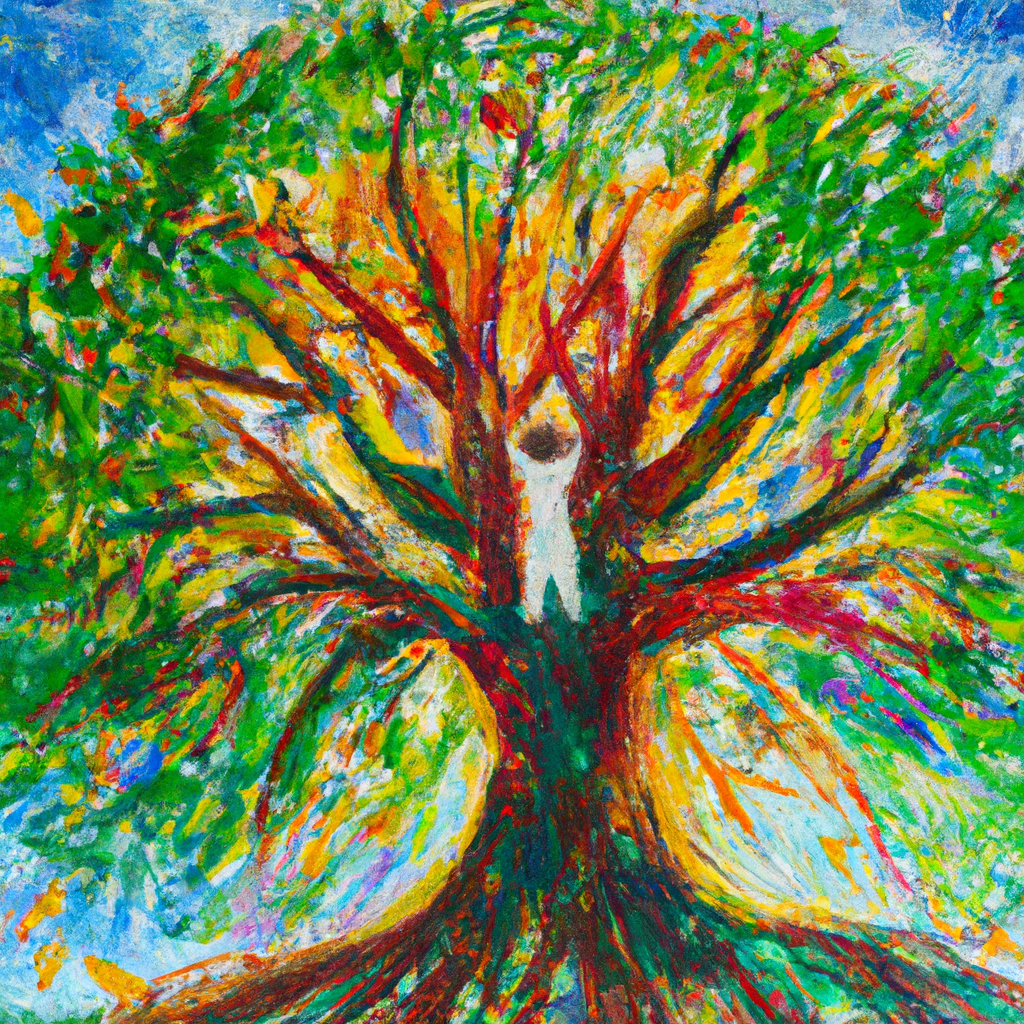

In [107]:
import requests
from PIL import Image
from io import BytesIO
from IPython.display import display
import datetime


response = requests.get(image_url)
image_data = BytesIO(response.content)
image = Image.open(image_data)

display(image)

# Generate a unique filename with the current date and time
current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M%S%f")
filename = f"image_{current_time}.jpg"  # The file will be saved with a .jpg extension

# Save the image in the current directory with the generated filename
image.save("images/"+ filename)



In [108]:
print(prompt)

 

The image is a colorful and vibrant painting of a tree. The tree's branches are stretched wide, reaching for the sky, while its roots dive deep into the earth. The leaves of the tree are a mixture of different shades of green, symbolizing growth and new beginnings. 

In the center of the tree, there is a small child swinging from one of the branches. The child's face is filled with joy and freedom as they soar through the air. The swing is made of a rainbow, representing hope and positivity. 

In the background, there are other elements of nature, such as birds flying, flowers blooming, and a gentle stream flowing. These represent the beauty and constant evolution of life. 

The sky above the tree is a mix of warm yellows, oranges, and pinks, showing the promise of a bright and beautiful future. 

Overall, the painting radiates a sense of hope, growth, and self-love. It reminds us to embrace our inner child, let go of any past pain, and celebrate our journey towards healing and self

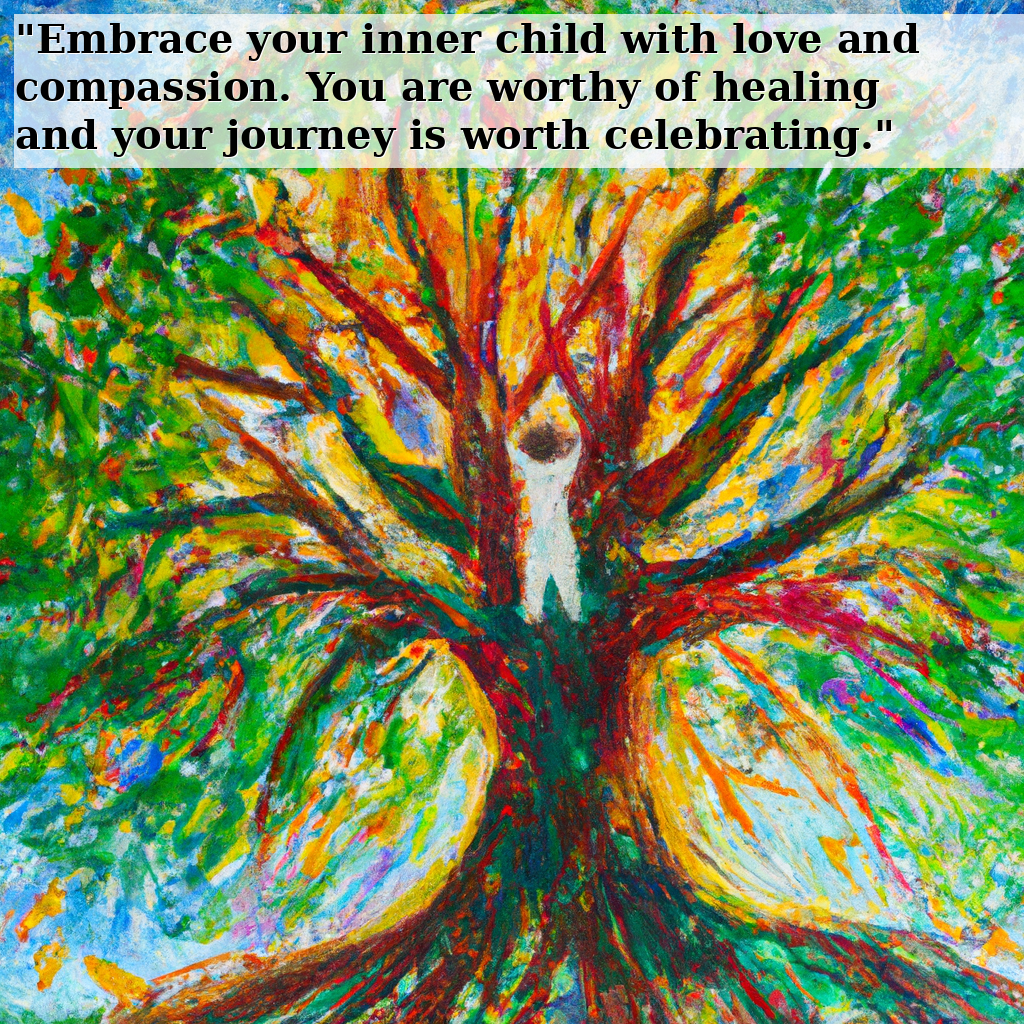

In [109]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import textwrap


def draw_multiline_text_with_frosted_background(image, text, position, font, text_color, shadow_color, shadow_offset, line_spacing=1.2):
    draw = ImageDraw.Draw(image)
    lines = textwrap.wrap(text, width=40)

    x, y = position
    shadow_x, shadow_y = shadow_offset

    # Estimate the size of the frosted background
    # Assuming average character width is roughly half the font size (a rough estimation)
    average_char_width = font.size // 1
    max_text_width = max(len(line) for line in lines) * average_char_width
    line_height = int(font.size * line_spacing)
    total_text_height = len(lines) * line_height

    frosted_background_size = (max_text_width + 20, total_text_height + 10)  # Extra padding
    frosted_background_position = (x - 1, y - 1)

    # Create frosted background (semi-transparent rectangle)
    frosted_background = Image.new("RGBA", frosted_background_size, (255, 255, 255, 180))
    image.paste(frosted_background, frosted_background_position, frosted_background)

    for line in lines:
        # Draw shadow
        draw.text((x + shadow_x, y + shadow_y), line, font=font, fill=shadow_color)
        
        # Draw text
        draw.text((x, y), line, font=font, fill=text_color)
        y += line_height  # Increment y position by line height

# Load the font
font_path = 'fonts/DejaVuSerif-Bold.ttf'
my_font = ImageFont.truetype(font_path, 40)

# Shadow settings
shadow_color = "white"
shadow_offset = (1, 1)


# Use the function with frosted background
draw_multiline_text_with_frosted_background(image, quote, (15, 15), my_font, 'black', shadow_color, shadow_offset)

# Generate a unique filename with the current date and time
current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f"image_{current_time}.jpg"  # The file will be saved with a .jpg extension

# Save the image in the current directory with the generated filename
image.save("images/"+ filename)

display(image)